<a href="https://colab.research.google.com/github/batuhan1734/Ecommerce_BigData_project/blob/main/Big_Data_Visiualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Visualize

## Installing Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import ast


## Upload CSV File

In [3]:
import pandas as pd

df = pd.read_csv("/content/predictions_output_part-00000-df0e50d2-0e62-476b-976c-7870c701019d-c000.csv")
df.head()


,label,prediction,probability
0,1,0.0,"[0.5142714534238956,0.48572854657610437]"
1,1,1.0,"[0.4946337385677524,0.5053662614322476]"
2,1,1.0,"[0.4108291000157562,0.5891708999842438]"
3,1,0.0,"[0.5447516100652551,0.45524838993474487]"
4,1,1.0,"[0.4469801460979248,0.5530198539020752]"


## Transforming the Probability Column

In [5]:
df["probability"] = df["probability"].apply(ast.literal_eval)
df["prob_1"] = df["probability"].apply(lambda x: x[1])


## Creating Confusion Matrix

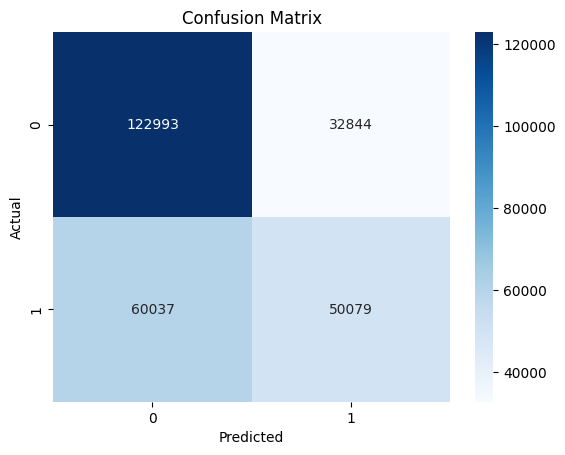

In [6]:
cm = confusion_matrix(df["label"], df["prediction"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## ROC Curve and AUC

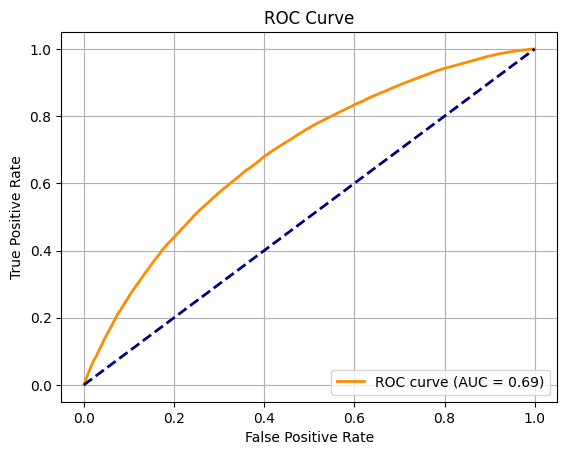

In [7]:
fpr, tpr, thresholds = roc_curve(df["label"], df["prob_1"])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


##  Precision, Recall, F1-Skor, Accuracy

In [8]:
print(classification_report(df["label"], df["prediction"]))


              precision    recall  f1-score   support

           0       0.67      0.79      0.73    155837
           1       0.60      0.45      0.52    110116

    accuracy                           0.65    265953
   macro avg       0.64      0.62      0.62    265953
weighted avg       0.64      0.65      0.64    265953

